Dataset details

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)

2 sex - student's sex (binary: "F" - female or "M" - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: "U" - urban or "R" - rural)

5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)

6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)

7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary 
education or 4 – higher education)

8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12 guardian - student's guardian (nominal: "mother", "father" or "other")

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20)


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
os.chdir('C:\\Users\\jiawy\\Desktop\\Machine learning datasets\\students performance')

In [3]:
df1 = pd.read_csv('student1.csv')
df2 = pd.read_csv('student1.csv')
# combine two datasets
df = pd.concat([df1,df2])
# check null values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [4]:
# check any abnormal datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790 entries, 0 to 394
Data columns (total 33 columns):
school        790 non-null object
sex           790 non-null object
age           790 non-null int64
address       790 non-null object
famsize       790 non-null object
Pstatus       790 non-null object
Medu          790 non-null int64
Fedu          790 non-null int64
Mjob          790 non-null object
Fjob          790 non-null object
reason        790 non-null object
guardian      790 non-null object
traveltime    790 non-null int64
studytime     790 non-null int64
failures      790 non-null int64
schoolsup     790 non-null object
famsup        790 non-null object
paid          790 non-null object
activities    790 non-null object
nursery       790 non-null object
higher        790 non-null object
internet      790 non-null object
romantic      790 non-null object
famrel        790 non-null int64
freetime      790 non-null int64
goout         790 non-null int64
Dalc          790 no

In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
# check unique value for each colums in order to do label encoding and one-hot encoding
for name in df.columns:
    print(name,df[name].unique())

school ['GP' 'MS']
sex ['F' 'M']
age [18 17 15 16 19 22 20 21]
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T']
Medu [4 1 3 2 0]
Fedu [4 1 2 3 0]
Mjob ['at_home' 'health' 'other' 'services' 'teacher']
Fjob ['teacher' 'other' 'services' 'health' 'at_home']
reason ['course' 'other' 'home' 'reputation']
guardian ['mother' 'father' 'other']
traveltime [2 1 3 4]
studytime [2 3 1 4]
failures [0 3 2 1]
schoolsup ['yes' 'no']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['no' 'yes']
romantic ['no' 'yes']
famrel [4 5 3 1 2]
freetime [3 2 4 1 5]
goout [4 3 2 1 5]
Dalc [1 2 5 3 4]
Walc [1 3 2 4 5]
health [3 5 1 2 4]
absences [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]
G1 [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
G2 [ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]
G3 [ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  0  4]


In [7]:
# convert the G1,G2,G3 columns into values
df = df.melt(id_vars=df[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences']], var_name='Period of grade',value_name='Grade')

In [8]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Period of grade,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,G1,5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,G1,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,G1,7
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,G1,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,G1,6
5,GP,M,16,U,LE3,T,4,3,services,other,...,no,5,4,2,1,2,5,10,G1,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,no,4,4,4,1,1,3,0,G1,12
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,4,1,4,1,1,1,6,G1,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,no,4,2,2,1,1,1,0,G1,16
9,GP,M,15,U,GT3,T,3,4,other,other,...,no,5,5,1,1,1,5,0,G1,14


In [9]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
count,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.679325
std,1.274695,1.093579,1.087052,0.696768,0.838354,0.742866,0.895712,0.997807,1.112103,0.889801,1.286537,1.388835,7.994646,3.923513
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000


In [10]:
# label encoding
def encoder(data):
    if data == 'yes':
        data = 1
    else:
        data = 0
    return data

names = ['famsup','paid','activities','nursery','higher','internet','romantic','schoolsup']
for name in names:
    df[name] = df[name].apply(encoder)

In [11]:
# one-hot encoding
df = pd.get_dummies(df)
df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'Grade', 'school_GP', 'school_MS', 'sex_F',
       'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3',
       'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'Period of grade_G1',
       'Period of grade_G2', 'Period of grade_G3'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2370 entries, 0 to 2369
Data columns (total 52 columns):
age                   2370 non-null int64
Medu                  2370 non-null int64
Fedu                  2370 non-null int64
traveltime            2370 non-null int64
studytime             2370 non-null int64
failures              2370 non-null int64
schoolsup             2370 non-null int64
famsup                2370 non-null int64
paid                  2370 non-null int64
activities            2370 non-null int64
nursery               2370 non-null int64
higher                2370 non-null int64
internet              2370 non-null int64
romantic              2370 non-null int64
famrel                2370 non-null int64
freetime              2370 non-null int64
goout                 2370 non-null int64
Dalc                  2370 non-null int64
Walc                  2370 non-null int64
health                2370 non-null int64
absences              2370 non-null int64
Grade      

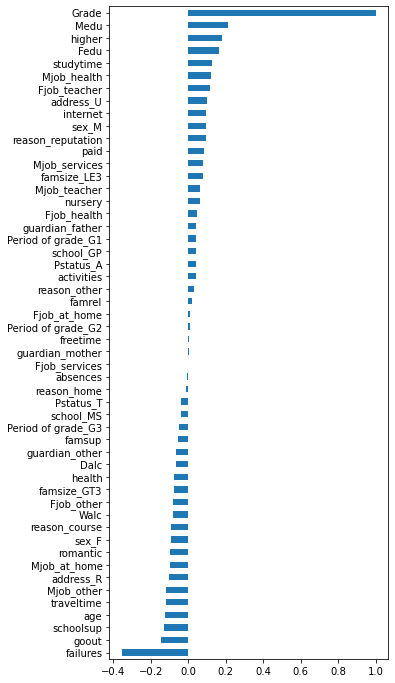

In [13]:
# check correlation with Grade and other features
df.corr()['Grade'].sort_values().plot(kind='barh',figsize=(5,12))

In [14]:
x = df.drop('Grade',axis=1).values
y = df['Grade'].values
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=2,test_size=0.2)

Best parameter:  147
MAE for test dataset:  0.27620460023859883
MSE for test dataset:  0.39303525941162115
Standard Deviation for Grade column:  3.922685666144015
Mean value for Grade column:  10.679324894514767

Test dataset score 0.973975
Train dataset score 0.999444


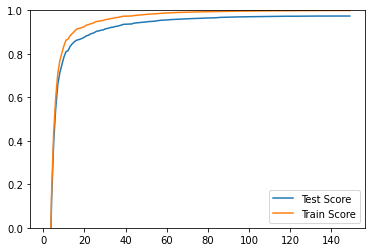

In [15]:
# first try with all features in and
# tuning hyperparam of n_estimators
test = []
train = []
ranges = range(1,150)
for i in ranges:
    rg = xgb.XGBRegressor(random_state=1,n_estimators=i).fit(xtrain,ytrain)
    test.append(rg.score(xtest,ytest))
    train.append(rg.score(xtrain,ytrain))
plt.plot(ranges,test,label='Test Score')
plt.plot(ranges,train,label='Train Score')
plt.legend()
plt.ylim(0,1)
best = np.argmax(test)+1
print('Best parameter: ',best)
rg = xgb.XGBRegressor(random_state=1,n_estimators=best).fit(xtrain,ytrain)
print('MAE for test dataset: ',mean_absolute_error(ytest,rg.predict(xtest)))
print('MSE for test dataset: ',mean_squared_error(ytest,rg.predict(xtest)))
print('Standard Deviation for Grade column: ',np.std(df['Grade']))
print('Mean value for Grade column: ',np.mean(df['Grade']))
print()
print('Test dataset score',np.round(rg.score(xtest,ytest),6))
print('Train dataset score',np.round(rg.score(xtrain,ytrain),6))

Best parameter:  7
MAE for test dataset:  0.19204490440052774
MSE for test dataset:  0.2482830856863813
Standard Deviation for Grade column:  3.922685666144015
Mean value for Grade column:  10.679324894514767

Test dataset score 0.98356
Train dataset score 0.999992


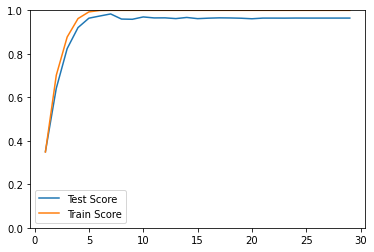

In [16]:
# tuning hyperparam of max_depth
test = []
train = []
ranges = range(1,30)
for i in ranges:
    rg = xgb.XGBRegressor(random_state=1,n_estimators=146,max_depth=i).fit(xtrain,ytrain)
    test.append(rg.score(xtest,ytest))
    train.append(rg.score(xtrain,ytrain))
plt.plot(ranges,test,label='Test Score')
plt.plot(ranges,train,label='Train Score')
plt.legend()
plt.ylim(0,1)
best = np.argmax(test)+1
print('Best parameter: ',best)
rg = xgb.XGBRegressor(random_state=1,n_estimators=146,max_depth=best).fit(xtrain,ytrain)
print('MAE for test dataset: ',mean_absolute_error(ytest,rg.predict(xtest)))
print('MSE for test dataset: ',mean_squared_error(ytest,rg.predict(xtest)))
print('Standard Deviation for Grade column: ',np.std(df['Grade']))
print('Mean value for Grade column: ',np.mean(df['Grade']))
print()
print('Test dataset score',np.round(rg.score(xtest,ytest),6))
print('Train dataset score',np.round(rg.score(xtrain,ytrain),6))
# test dataset achieved 98% accuracy